# EDA

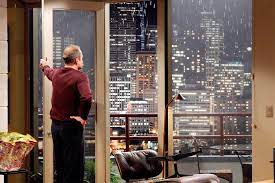

In [139]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import lxml
import folium 
import streamlit_folium as st

from streamlit_folium import st_folium
from folium.plugins import FloatImage
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Data Importing
- The main Dataset is the King County House prices dataset, contains 21 columns.
- Loading the data into Panda's DataFrame. 
- Below we see the Dataset. 

In [140]:
# loading and previewing the dataframe
df = pd.read_csv("data/King_County_House_prices_dataset.csv")
print(type(df))
df.head(10)

<class 'pandas.core.frame.DataFrame'>


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
5,7237550310,5/12/2014,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,11,3890,1530.0,2001,0.000,98053,47.656,-122.005,4760,101930
6,1321400060,6/27/2014,257500.000,3,2.250,1715,6819,2.000,0.000,0.000,...,7,1715,?,1995,0.000,98003,47.310,-122.327,2238,6819
7,2008000270,1/15/2015,291850.000,3,1.500,1060,9711,1.000,0.000,NaN,...,7,1060,0.0,1963,0.000,98198,47.410,-122.315,1650,9711
8,2414600126,4/15/2015,229500.000,3,1.000,1780,7470,1.000,0.000,0.000,...,7,1050,730.0,1960,0.000,98146,47.512,-122.337,1780,8113
9,3793500160,3/12/2015,323000.000,3,2.500,1890,6560,2.000,0.000,0.000,...,7,1890,0.0,2003,0.000,98038,47.368,-122.031,2390,7570


Column Names and descriptions for King County Data Set

- id - unique identified for a house
- dateDate - house was sold
- pricePrice - is prediction target
- bedroomsNumber - # of bedrooms
- bathroomsNumber - # of bathrooms
- sqft_livingsquare - footage of the home
- sqft_lotsquare - footage of the lot
- floorsTotal - floors (levels) in house
- waterfront - House which has a view to a waterfront
- view - Has been viewed
- condition - How good the condition is ( Overall )
- grade - overall grade given to the housing unit, based on King County grading system
- sqft_above - square footage of house apart from basement
- sqft_basement - square footage of the basement
- yr_built - Built Year
- yr_renovated - Year when house was renovated
- zipcode - zip
- lat - Latitude coordinate
- long - Longitude coordinate
- sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
- sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors


We add the new columns named:

- sqft_basement_1 : removing the missing data of sqft_basement
- sold_year : year of selling house
- sold_month : month of selling house
- price_per_sqft : price per square

In [141]:
# Descriptive statistics of the Dataset

df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19221.000,21534.000,21597.000,21597.000,21597.000,21597.000,17755.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,540296.574,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,1788.597,1971.000,83.637,98077.952,47.560,-122.214,1986.620,12758.284
std,2876735715.748,367368.140,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,827.760,29.375,399.946,53.513,0.139,0.141,685.230,27274.442
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,370.000,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000
25%,2123049175.000,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000
50%,3904930410.000,450000.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,1560.000,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000
75%,7308900490.000,645000.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,2210.000,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000
max,9900000190.000,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,2015.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000


 We can see the most of the Houses are sold between 300K and 650K dollar. In column bedrooms, we see the max value as 33 bedrooms! 

In [142]:
#check : datatypes and shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [143]:
# check size, length and shape
print(f"Size:  {df.size}")
print(f"Length: {len(df)}")
print(f"Shape: {df.shape}")

Size:  453537
Length: 21597
Shape: (21597, 21)


We can see above that it is very large Dataset. Look at: Shape is (21597, 21), which prefers to ( entries , columns).

In [144]:
# Check for missing values.
# In order to get the total summation of all missing values in the DataFrame, we chain two .sum() methods together.
# Let's look for the NaN in the columns

# Columns with NaNs
df.columns[df.isna().any()].tolist() 

['waterfront', 'view', 'yr_renovated']

In [145]:
# Columns with NaN-Frequency
(df.isna().sum()/df.shape[0]*100)[df.isna().sum() != 0]

waterfront     11.002
view            0.292
yr_renovated   17.790
dtype: float64

In [146]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We can see that we have 3 columns with NaN's. Those are 'waterfront, view, yr_renovated'. 
- waterfront    has 2376 missing values , 11.002 %
- view          has 63 missing values,     0.292 %
- yr_renovated  has 3842 missing values,  17.790 %

In [147]:
# Quantitative variables can be classified as discrete or continuous.Continuous
# data represent measurements; their possible values cannot be counted and can 
# only be described using intervals on the real number line.

df.select_dtypes(include='number') #continious



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,3,7,1180,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,3,7,2170,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,180000.000,2,1.000,770,10000,1.000,0.000,0.000,3,6,770,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,5,7,1050,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,3,8,1680,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,3,8,1530,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,3,8,2310,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,3,7,1020,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,3,8,1600,2004,0.000,98027,47.535,-122.069,1410,1287


In [148]:
#Categorical variables contain a finite number of categories or distinct groups. 
# Categorical data might not have a logical order.
# For example, categorical example include gender, color types, 
# and country names, marital status, hometown, season types .

df.select_dtypes(exclude='number') #categorical

,date,sqft_basement
0,10/13/2014,0.0
1,12/9/2014,400.0
2,2/25/2015,0.0
3,12/9/2014,910.0
4,2/18/2015,0.0
...,...,...
21592,5/21/2014,0.0
21593,2/23/2015,0.0
21594,6/23/2014,0.0
21595,1/16/2015,0.0


## Research Questions and Hypothesis Generation:


# Questions: 

- Does the size of house affect the Price?  ---> the more rooms the more Price 
- Does the location of the house affect the Price? ---> the more central the more Price; if country, then lower price
- Does the selling price dependent on the time of the year?  
- Does Buying a family house with social neigborhood in city(central location) more expensive?
- Are House Prices dependent on time of the built year?
- Are House Prices dependent on the status of the renovation?


# Stakeholder:

Thomas Hansen / Buyer, 
5 kids, 
No money,
wants nice (social) neighborhood

# Story: 

Our Stakeholder Thomas is an employee by Walmart and earned not too much. He wants to buy a Family House for his big family. The House should be cheap, big and has social neighborhood.


# Needs of Thomas:                                                             

-  big house with 4+Bedrooms, because of a big family with 5 kids            
-  very cheap house, because Thomas earns a little bit of money. Max House price is for him 300K USD                                     
-  social neigborhood: he loves to be crowded as having people around.                                                         

# So; our Hypotheses are,

- the smaller the house is, is the price lower (SIZE)
- the big house selling price depends on the time of the year, at winter months is the selling price lower. (TIME)
- buying a big house is more expensive in the city than in country(LOCATION)
 



## Exploring the Data and Data Cleaning

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [150]:
# missing values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [151]:
df['view'].value_counts()

0.000    19422
2.000      957
3.000      508
1.000      330
4.000      317
Name: view, dtype: int64

In [152]:
df['waterfront'].value_counts()

0.000    19075
1.000      146
Name: waterfront, dtype: int64

In [153]:
df['yr_renovated'].value_counts()

0.000       17011
2014.000       73
2013.000       31
2003.000       31
2007.000       30
            ...  
1951.000        1
1953.000        1
1946.000        1
1976.000        1
1948.000        1
Name: yr_renovated, Length: 70, dtype: int64

We have an extreme value in 'bedrooms' column, 33 bedrooms.So we can remove the house with 33 bedrooms.
And we know that the 'view' column has 0.29% missing values and most of the values are zero. So we can replace the missing values with zero too.  

waterfront     11.002
view            0.292
yr_renovated   17.790
dtype: float64

0.000    19422
2.000      957
3.000      508
1.000      330
4.000      317
Name: view, dtype: int64

In [154]:
#replace the missing data in 'view' with '0'
df['view'].fillna(0, inplace=True)

In [155]:
#remove the house with 33 bedrooms, and 1.75 bathrooms
df.query('bedrooms == 33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,6/25/2014,640000.000,33,1.750,1620,6000,1.000,0.000,0.000,...,7,1040,580.0,1947,0.000,98103,47.688,-122.331,1330,4700


In [156]:
df.drop(15856, axis=0, inplace=True)

In [157]:
df.query('bedrooms == 33')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [158]:
# Cheking for duplicated rows
# it is possible that the data exists as dublicated.
duplicates = df[df.duplicated()]
print(len(duplicates))

0


In [159]:
# Cheking for rows with same id
duplicates = df[df.duplicated(subset=['id'])]
print(len(duplicates))

177


In [160]:
# to Check initial size of df to see how much data we lost
originalsize = len(df)
originalsize

21596

In [161]:
# we count the number of distinct elements
df.nunique()

id               21419
date               372
price             3622
bedrooms            11
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [162]:
#The sqft_basement column has some Questionmarks. We are doing the following to replace it with NaNs.  
df[df['sqft_basement'] == '?'].shape[0]
df['sqft_basement'] = df['sqft_basement'].replace('?', np.NaN)
df['sqft_basement'] = df['sqft_basement'].astype(float)

# we add here a new column names sqft_basement_1, so we remove the missing values of sqft_basement
df.eval('sqft_basement_1 = sqft_living - sqft_above', inplace=True)
df.drop('sqft_basement', axis=1, inplace=True)

## Consider outliers

Let us view the distributions using histograms to get a sense of the spread of the various features.

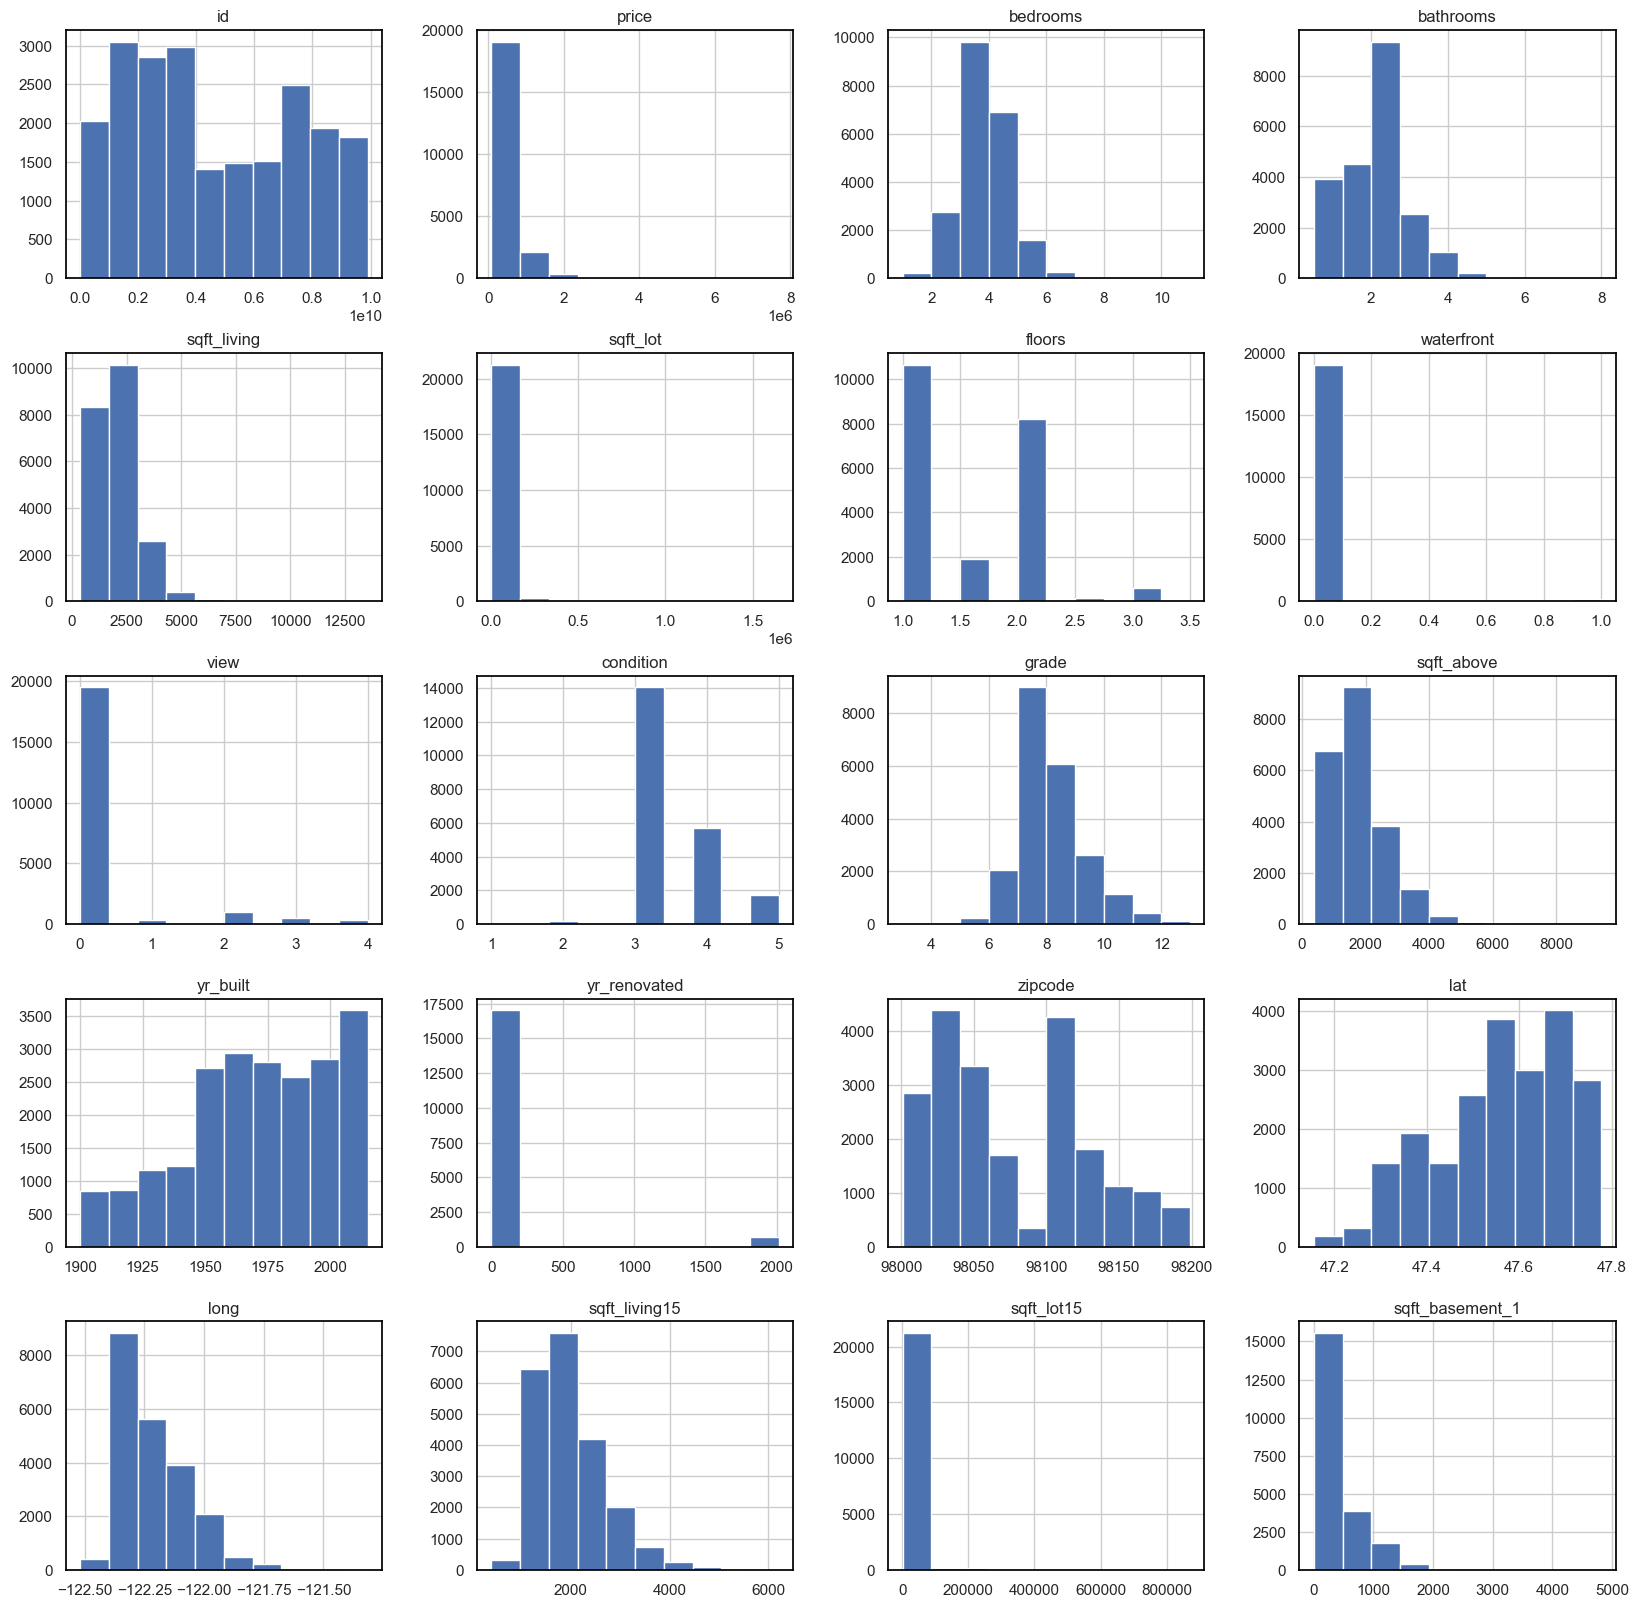

In [163]:
#this is the distribution of variables in the dataset.(Make a histogram of the DataFrame’s columns.)
#the categorical variables (date and Basement) are not included. 
df.hist(figsize=(20,20));

In [164]:
df['price'].describe().round(3)

count     21596.000
mean     540291.957
std      367376.019
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

In [165]:
#converting dates to datetime dtype
df.date = pd.to_datetime(df.date)
df.yr_renovated = pd.to_datetime(df.yr_renovated)

To analyse the data for the buying cheaper, we add new columns such as selling year and selling month.

In [166]:
df['sold_year'] = df.date.dt.year
df['sold_month'] = df.date.dt.month


In [167]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_1,sold_year,sold_month
count,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,19220.000,21596.000,21596.000,...,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000
mean,4580575157.071,540291.957,3.372,2.116,2080.343,15099.830,1.494,0.008,0.233,3.410,...,1788.632,1971.001,98077.951,47.560,-122.214,1986.651,12758.657,291.712,2014.323,6.574
std,2876764127.563,367376.019,0.904,0.769,918.122,41413.549,0.540,0.087,0.765,0.650,...,827.763,29.375,53.514,0.139,0.141,685.232,27275.018,442.674,0.468,3.115
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,...,370.000,1900.000,98001.000,47.156,-122.519,399.000,651.000,0.000,2014.000,1.000
25%,2123049166.750,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,...,1190.000,1951.000,98033.000,47.471,-122.328,1490.000,5100.000,0.000,2014.000,4.000
50%,3904930470.000,450000.000,3.000,2.250,1910.000,7619.000,1.500,0.000,0.000,3.000,...,1560.000,1975.000,98065.000,47.572,-122.231,1840.000,7620.000,0.000,2014.000,6.000
75%,7308950385.000,645000.000,4.000,2.500,2550.000,10685.500,2.000,0.000,0.000,4.000,...,2210.000,1997.000,98118.000,47.678,-122.125,2360.000,10083.000,560.000,2015.000,9.000
max,9900000190.000,7700000.000,11.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,...,9410.000,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,4820.000,2015.000,12.000


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21596 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               21596 non-null  int64         
 1   date             21596 non-null  datetime64[ns]
 2   price            21596 non-null  float64       
 3   bedrooms         21596 non-null  int64         
 4   bathrooms        21596 non-null  float64       
 5   sqft_living      21596 non-null  int64         
 6   sqft_lot         21596 non-null  int64         
 7   floors           21596 non-null  float64       
 8   waterfront       19220 non-null  float64       
 9   view             21596 non-null  float64       
 10  condition        21596 non-null  int64         
 11  grade            21596 non-null  int64         
 12  sqft_above       21596 non-null  int64         
 13  yr_built         21596 non-null  int64         
 14  yr_renovated     17754 non-null  datet

In [169]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_1,sold_year,sold_month
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,1955,1970-01-01 00:00:00.000000000,98178,47.511,-122.257,1340,5650,0,2014,10
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,1951,1970-01-01 00:00:00.000001991,98125,47.721,-122.319,1690,7639,400,2014,12
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,1933,NaT,98028,47.738,-122.233,2720,8062,0,2015,2
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1965,1970-01-01 00:00:00.000000000,98136,47.521,-122.393,1360,5000,910,2014,12
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,1987,1970-01-01 00:00:00.000000000,98074,47.617,-122.045,1800,7503,0,2015,2


In [170]:
df['price_per_sqft'] = df['price'] / df['sqft_lot']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_1,sold_year,sold_month,price_per_sqft
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,1970-01-01 00:00:00.000000000,98178,47.511,-122.257,1340,5650,0,2014,10,39.274
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,1970-01-01 00:00:00.000001991,98125,47.721,-122.319,1690,7639,400,2014,12,74.289
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,NaT,98028,47.738,-122.233,2720,8062,0,2015,2,18.000
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1970-01-01 00:00:00.000000000,98136,47.521,-122.393,1360,5000,910,2014,12,120.800
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,1970-01-01 00:00:00.000000000,98074,47.617,-122.045,1800,7503,0,2015,2,63.119


## Correlation



In [171]:
# Compute the correlation matrix , plot correlation matrix.
cormat = df.corr()
round(cormat,2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_1,sold_year,sold_month,price_per_sqft
id,1.000,-0.020,0.000,0.010,-0.010,-0.130,0.020,-0.000,0.010,-0.020,...,0.020,-0.010,-0.000,0.020,-0.000,-0.140,-0.010,0.010,-0.010,0.060
price,-0.020,1.000,0.320,0.530,0.700,0.090,0.260,0.280,0.390,0.040,...,0.050,-0.050,0.310,0.020,0.590,0.080,0.320,0.000,-0.010,0.310
bedrooms,0.000,0.320,1.000,0.530,0.590,0.030,0.180,-0.000,0.080,0.020,...,0.160,-0.160,-0.010,0.140,0.400,0.030,0.310,-0.010,-0.000,-0.060
bathrooms,0.010,0.530,0.530,1.000,0.760,0.090,0.500,0.070,0.190,-0.130,...,0.510,-0.200,0.020,0.220,0.570,0.090,0.280,-0.030,0.010,0.200
sqft_living,-0.010,0.700,0.590,0.760,1.000,0.170,0.350,0.110,0.280,-0.060,...,0.320,-0.200,0.050,0.240,0.760,0.180,0.440,-0.030,0.010,0.020
sqft_lot,-0.130,0.090,0.030,0.090,0.170,1.000,-0.000,0.020,0.080,-0.010,...,0.050,-0.130,-0.090,0.230,0.140,0.720,0.020,0.010,-0.000,-0.210
floors,0.020,0.260,0.180,0.500,0.350,-0.000,1.000,0.020,0.030,-0.260,...,0.490,-0.060,0.050,0.130,0.280,-0.010,-0.250,-0.020,0.010,0.480
waterfront,-0.000,0.280,-0.000,0.070,0.110,0.020,0.020,1.000,0.410,0.020,...,-0.030,0.030,-0.010,-0.040,0.090,0.030,0.090,-0.010,0.010,0.030
view,0.010,0.390,0.080,0.190,0.280,0.080,0.030,0.410,1.000,0.050,...,-0.050,0.090,0.010,-0.080,0.280,0.070,0.270,0.000,-0.010,0.080
condition,-0.020,0.040,0.020,-0.130,-0.060,-0.010,-0.260,0.020,0.050,1.000,...,-0.360,0.000,-0.020,-0.110,-0.090,-0.000,0.170,-0.050,0.020,-0.090


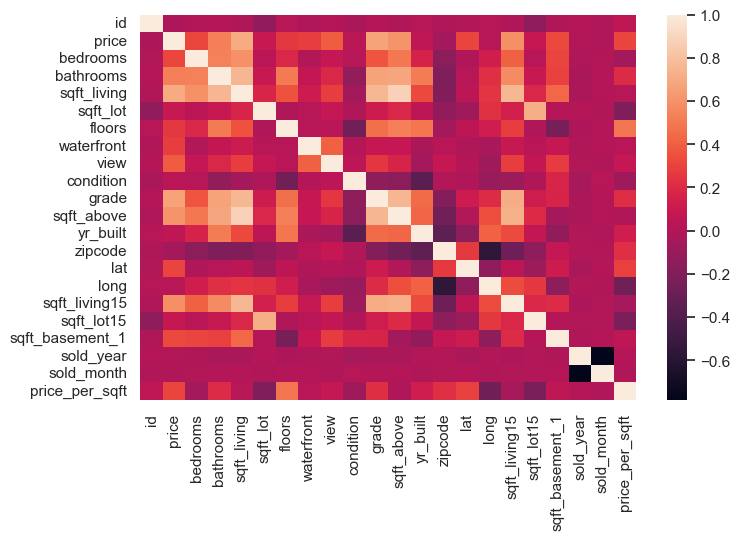

In [172]:
#once the correlation matrix is defined (I assigned to the variable cormat above), 
# it can be passed to Seaborn’s heatmap() method to create a heatmap (or headgrid).
# The basic idea of heatmaps is that they replace numbers with colors of varying shades,
# as indicated by the scale on the right. 

sns.heatmap(cormat);

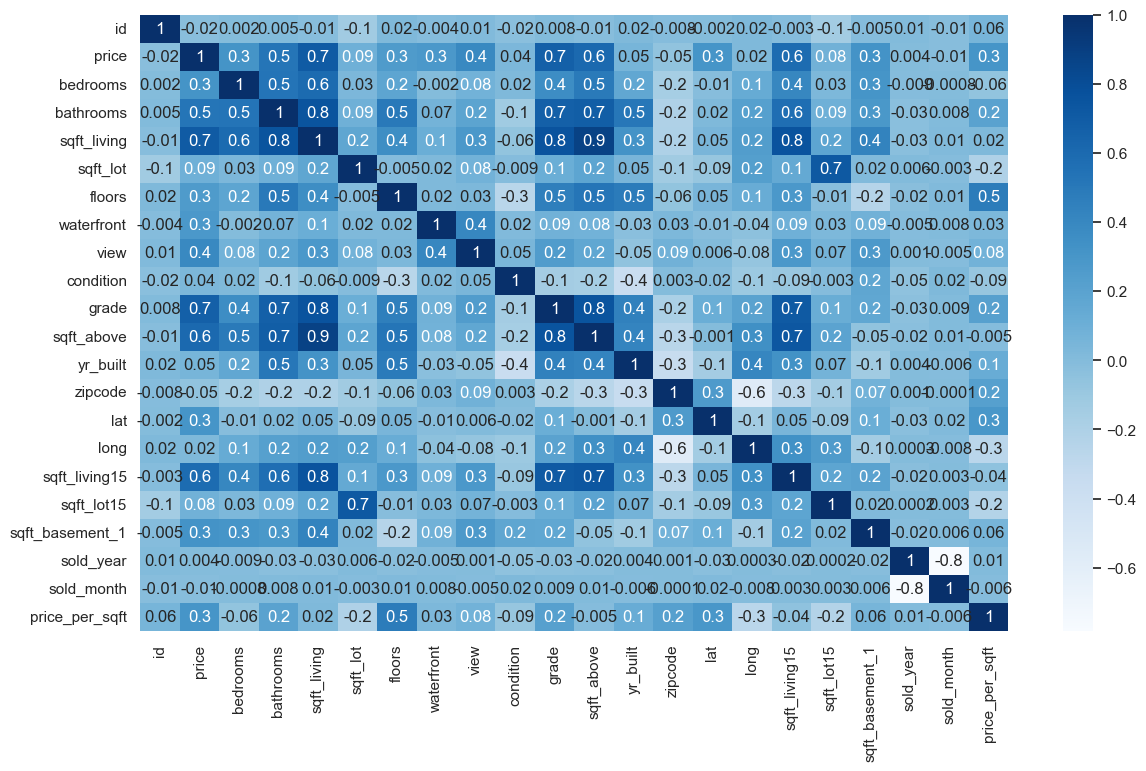

In [173]:

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

## Visualisation of the population density & Map

We prepare now a map of King County. 

In [174]:
#Helper function for formatting large Numbers in X/Y-Tick-Labels
#Returns a formatter for 'set_major_formatter'

def format_number(data_value, indx):
   
    if data_value >= 1_000_000:
        formatter = '{:1.1f}M'.format(data_value*0.000_001)
    else:
        formatter = '{:1.0f}K'.format(data_value*0.001)
    return formatter

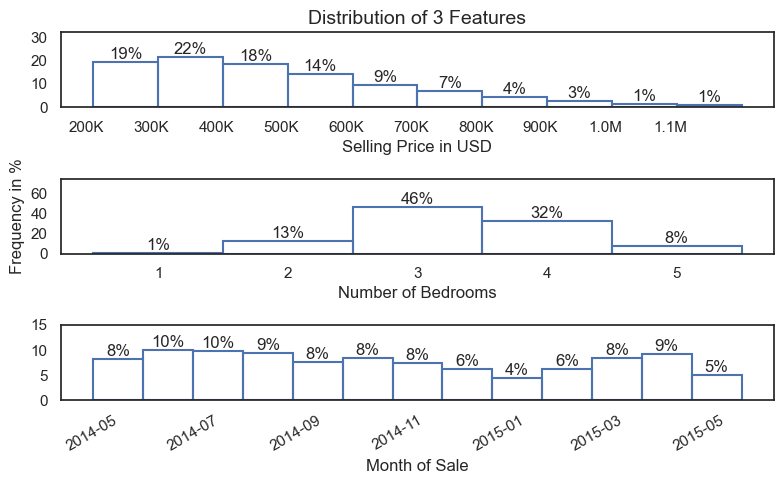

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_1,sold_year,sold_month,price_per_sqft
count,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,19220.000,21596.000,21596.000,...,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000,21596.000
mean,4580575157.071,540291.957,3.372,2.116,2080.343,15099.830,1.494,0.008,0.233,3.410,...,1971.001,98077.951,47.560,-122.214,1986.651,12758.657,291.712,2014.323,6.574,88.988
std,2876764127.563,367376.019,0.904,0.769,918.122,41413.549,0.540,0.087,0.765,0.650,...,29.375,53.514,0.139,0.141,685.232,27275.018,442.674,0.468,3.115,94.062
min,1000102.000,78000.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,...,1900.000,98001.000,47.156,-122.519,399.000,651.000,0.000,2014.000,1.000,0.163
25%,2123049166.750,322000.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,...,1951.000,98033.000,47.471,-122.328,1490.000,5100.000,0.000,2014.000,4.000,33.333
50%,3904930470.000,450000.000,3.000,2.250,1910.000,7619.000,1.500,0.000,0.000,3.000,...,1975.000,98065.000,47.572,-122.231,1840.000,7620.000,0.000,2014.000,6.000,59.261
75%,7308950385.000,645000.000,4.000,2.500,2550.000,10685.500,2.000,0.000,0.000,4.000,...,1997.000,98118.000,47.678,-122.125,2360.000,10083.000,560.000,2015.000,9.000,107.610
max,9900000190.000,7700000.000,11.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,...,2015.000,98199.000,47.778,-121.315,6210.000,871200.000,4820.000,2015.000,12.000,2019.704


In [175]:
fig, axes = plt.subplots(3,1)
#Number of Houses per price category 
g = sns.histplot(ax=axes[0],data=df,x = 'price',log_scale = (False,False),
    element="bars", stat='percent', fill = False, binwidth = 100e3, binrange=(df.price.quantile(0.05),df.price.quantile(0.95)))
g.set_xticks(np.arange(2e5,12e5,1e5))
g.bar_label(g.containers[0], fmt='%.f%%')
g.set_ylim(0,32)
g.set_xlabel('Selling Price in USD')
g.ticklabel_format(useOffset=False, style='plain')
g.xaxis.set_major_formatter(format_number)
g.set_yticks(np.arange(0,35,10))
g.set_ylabel('')
g.set_title('Distribution of 3 Features',fontsize = 14)
#distribution of bedrooms in sold houses. quantile(0.95) because i dont want to show outliers for better visualisation)
g=sns.histplot(ax=axes[1], data=df, x= 'bedrooms', binwidth=1, binrange=(0.5,df.bedrooms.quantile(0.95)), element="bars", stat='percent', fill = False)
g.bar_label(g.containers[0], fmt='%.f%%',label_type='edge')
g.set_ylim(0,75)
g.set_yticks(np.arange(0,80,20))
g.set_xlabel('Number of Bedrooms')
g.set_ylabel('Frequency in %')

# number of houses sold per month 
g = sns.histplot(ax=axes[2], data=df, x = pd.to_datetime(df.date), binwidth=30, element="bars", stat='percent', fill = False) #bins of size 30 days
plt.xticks(rotation=30)
g.bar_label(g.containers[0], fmt='%.f%%')
g.set_ylim(0,15)
g.set_yticks(np.arange(0,20,5))
g.set_xlabel('Month of Sale')
g.set_ylabel('')
plt.tight_layout()
plt.show()

#show some simple descriptive statistics
df.describe()

Now we can search for our stakeholder Thomas. He interested in the House with more than 4 bedrooms. 

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

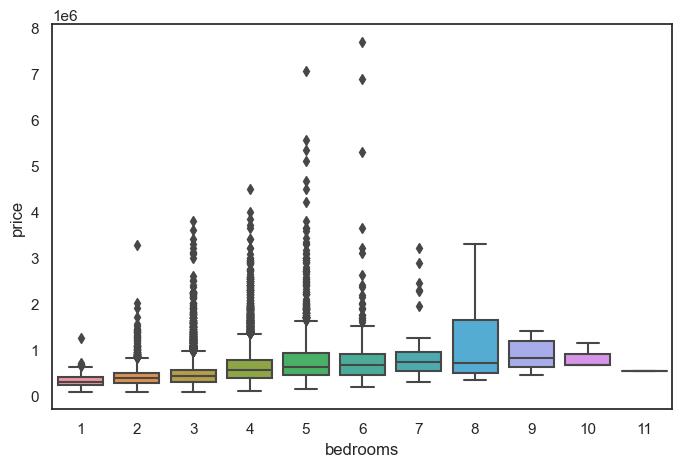

In [176]:
sns.boxplot(x='bedrooms', y='price', data = df)


<AxesSubplot: xlabel='bathrooms', ylabel='price'>

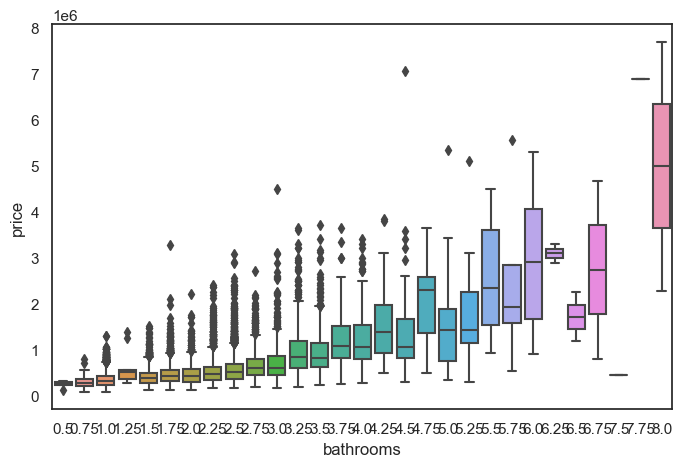

In [177]:
sns.boxplot(x='bathrooms', y='price', data = df)

<AxesSubplot: xlabel='sqft_living', ylabel='price'>

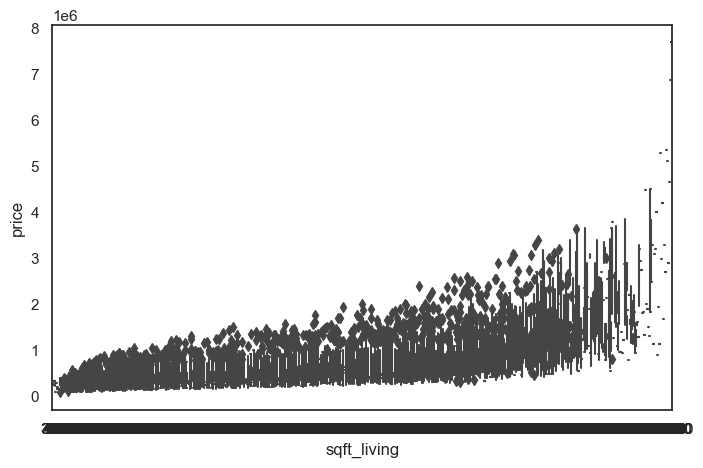

In [178]:
sns.boxplot(x='sqft_living', y='price', data = df)

<AxesSubplot: xlabel='zipcode', ylabel='price'>

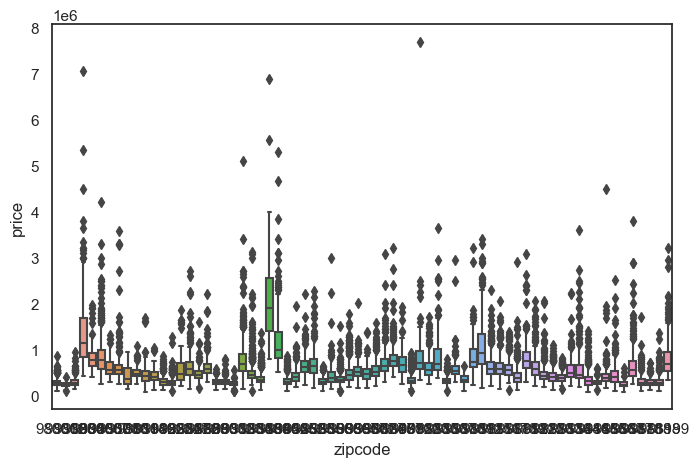

In [179]:
sns.boxplot(x='zipcode', y='price', data = df)

<AxesSubplot: xlabel='sold_month', ylabel='price'>

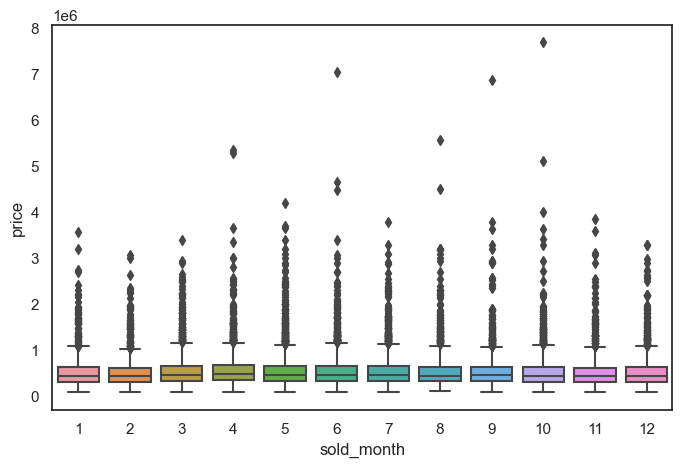

In [180]:
sns.boxplot(x='sold_month', y='price', data = df)

<AxesSubplot: xlabel='sqft_living15', ylabel='price'>

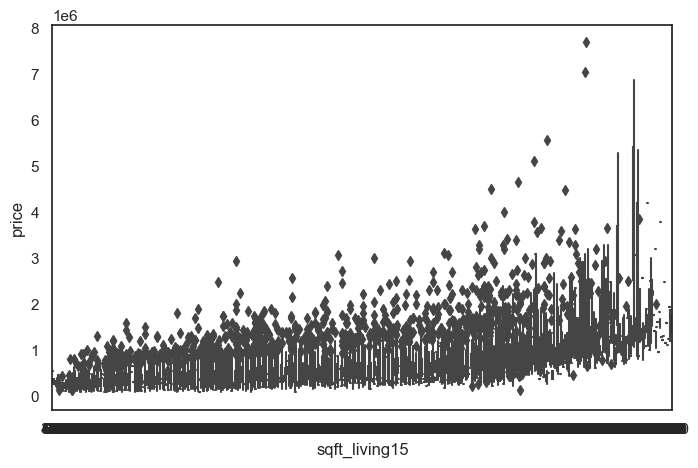

In [181]:
sns.boxplot(x='sqft_living15', y='price', data = df)

<AxesSubplot: xlabel='grade', ylabel='price'>

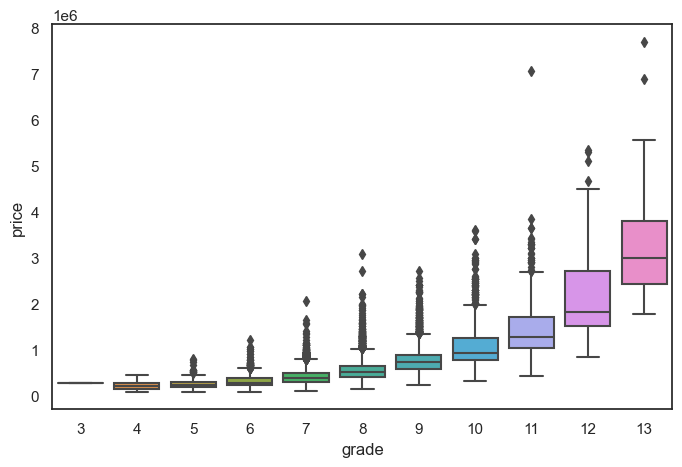

In [182]:
sns.boxplot(x='grade', y='price', data = df)

- The median house price does not appear to be affected by the sale month. The sale_month feature and visualisation above demonstrate that April and May are the most popular months for house sales. In contrast, January and February have the lowest number of sales.
- we can say that the features:
   - bedrooms
   - bathrooms
   - sqft_living15
   - grade
   - zipcode
has the most impact on predicting the price of the house.

In [183]:
df_thomas = df[df.bedrooms > 3][df.bedrooms <8]
df_thomas.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_basement_1,sold_year,sold_month,price_per_sqft
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,1970-01-01,98136,47.521,-122.393,1360,5000,910,2014,12,120.800
5,7237550310,2014-05-12,1230000.000,4,4.500,5420,101930,1.000,0.000,0.000,...,1970-01-01,98053,47.656,-122.005,4760,101930,1530,2014,5,12.067
14,1175000570,2015-03-12,530000.000,5,2.000,1810,4850,1.500,0.000,0.000,...,1970-01-01,98107,47.670,-122.394,1360,4850,0,2015,3,109.278
15,9297300055,2015-01-24,650000.000,4,3.000,2950,5000,2.000,0.000,3.000,...,1970-01-01,98126,47.571,-122.375,2140,4000,970,2015,1,130.000
17,6865200140,2014-05-29,485000.000,4,1.000,1600,4300,1.500,0.000,0.000,...,1970-01-01,98103,47.665,-122.343,1610,4300,0,2014,5,112.791


## Analysis 

In [184]:
df['bedrooms'].value_counts(normalize = True)

3    0.455
4    0.319
2    0.128
5    0.074
6    0.013
1    0.009
7    0.002
8    0.001
9    0.000
10   0.000
11   0.000
Name: bedrooms, dtype: float64

- the most number of houses (nearly the half of the houses) have 3 bedrooms.

In [185]:
# explore zipcode
df['zipcode'].value_counts()

98103    601
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

- we can see here that the most common zipcode is 98103
- We see that there are 70 unique zipcodes represented in our dataset.

In [186]:
df['bathrooms'].value_counts(normalize = True)

2.500   0.249
1.000   0.178
1.750   0.141
2.250   0.095
2.000   0.089
1.500   0.067
2.750   0.055
3.000   0.035
3.500   0.034
3.250   0.027
3.750   0.007
4.000   0.006
4.500   0.005
4.250   0.004
0.750   0.003
4.750   0.001
5.000   0.001
5.250   0.001
5.500   0.000
1.250   0.000
6.000   0.000
0.500   0.000
5.750   0.000
6.750   0.000
8.000   0.000
6.250   0.000
6.500   0.000
7.500   0.000
7.750   0.000
Name: bathrooms, dtype: float64

- the number of bathrooms is more varied compared to the bedrooms in each houses 
 almost a quarter of the houses has 2.5 bathrooms

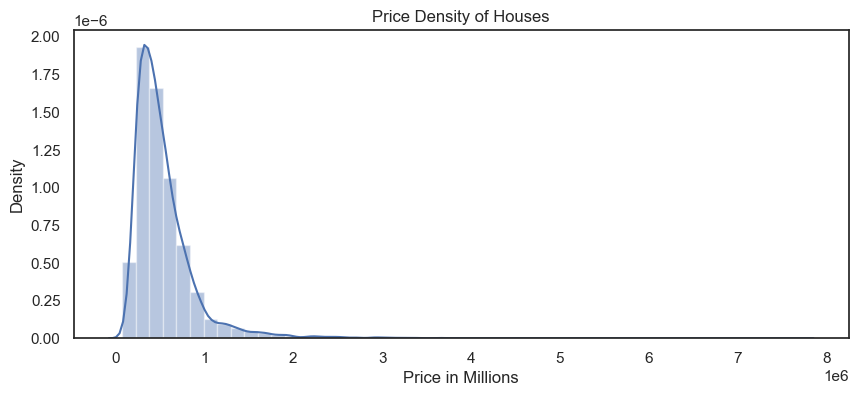

In [187]:
plt.figure(figsize=(10,4))

price_dist = sns.distplot(df["price"])
price_dist.set(xlabel="Price in Millions", title="Price Density of Houses")
plt.show()

In [188]:
# Create a copy to manipulate
df_copy = df.copy()

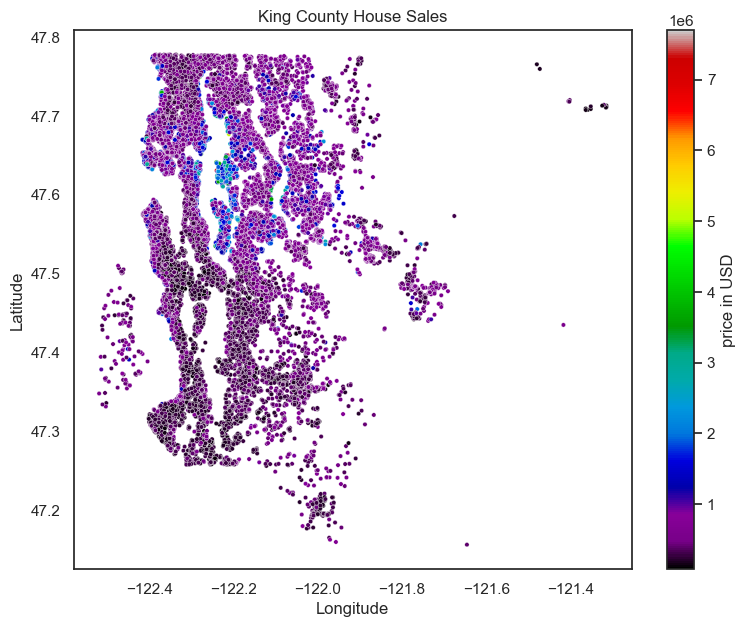

In [189]:
# Plot scatter plot
plt.figure(figsize = (9,7))
ax = sns.scatterplot(x = df_copy['long'], y = df_copy['lat'], hue = df_copy['price'],
                palette = 'nipy_spectral',s=10, legend = None, data = df_copy)

norm = plt.Normalize(df_copy['price'].min(), df_copy['price'].max())
smap = plt.cm.ScalarMappable(cmap='nipy_spectral', norm=norm)
smap.set_array([])

ax.figure.colorbar(smap, label = 'price in USD')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('King County House Sales')
plt.show()

The highest house prices are concentrated in the area with latitude around 47.6 and 
longitude around -122.25. There is a disparity with southern locations achieving lower house prices.

In [190]:
df[['zipcode', 'lat', 'long']].value_counts()

zipcode  lat     long    
98117    47.684  -122.387    4
98105    47.665  -122.284    4
98103    47.665  -122.338    4
98007    47.660  -122.146    4
98103    47.654  -122.354    4
                            ..
98042    47.317  -122.081    1
                 -122.046    1
         47.315  -122.079    1
                 -122.043    1
98199    47.671  -122.409    1
Length: 20819, dtype: int64

In [191]:
df_karte = pd.read_html('http://zipatlas.com/us/wa/seattle/zip-code-comparison/population-density.htm')[11]
df_karte

,0,1,2,3,4,5,6
0,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank
1,1.,98174,"47.604569, -122.335359","Seattle, Washington",180,50978.44,#50
2,2.,98121,"47.614743, -122.345855","Seattle, Washington",8558,17894.56,#250
3,3.,98104,"47.601701, -122.327670","Seattle, Washington",13095,17156.75,#267
4,4.,98101,"47.610198, -122.334555","Seattle, Washington",9010,16603.32,#285
5,5.,98102,"47.634416, -122.321561","Seattle, Washington",19424,14594.02,#344
6,6.,98122,"47.610445, -122.302983","Seattle, Washington",28790,12332.03,#440
7,7.,98105,"47.662129, -122.296786","Seattle, Washington",38963,9393.63,#650
8,8.,98107,"47.668104, -122.377023","Seattle, Washington",18516,8571.51,#736
9,9.,98103,"47.678255, -122.338152","Seattle, Washington",41971,8324.30,#773


below we can see the map...

In [195]:
mymap = folium.Map(location=[47.604569, -122.335359], zoom_start=15)
# Get the highest average house price
maxave = int(df.groupby(['zipcode']).mean()['price'].max())
print("Highest City House Price is: ", maxave)

# Create a color map to match house prices. White - low price, Black - high price
colormap = ['#00009B' ,'#0099FF' ,'#63FF9B' ,'#FFFB00' ,'#FF2F00' , '#8B0000']

# Add marker info 

for index, row in df.groupby('zipcode').agg({'lat': 'mean','long': 'mean', 'price':'mean', 'zipcode':'count' }).iterrows(): 
    # Set icon color based on price 
    theCol = colormap[ int((len(colormap) - 1 ) *  float( row['price']) / maxave) ]
    markerText =  ( 'Average price : ' + str(round(row['price'], 2) ) +' $' + '\n' + 'Houses sold : ' + str(row['zipcode']) )
    folium.CircleMarker( radius=(row['zipcode'])/15, location=[row['lat'],row['long']], popup=folium.Popup(markerText,max_width=150,min_width=150), color= theCol,fill=True,fill_color=theCol,  ).add_to(mymap)

FloatImage('https://lh3.googleusercontent.com/proxy/SRXTqZngcyOscx1nR1iB9c4IobPtOn0cEROsZ_wK6CO3nfAjD4e4TDXPDjN3AU2ZLJxzJQaoLJnlqk9zZevN7S2wZZctQysIIKOvigpGatc', bottom=0, left=65).add_to(mymap)
mymap

Highest City House Price is:  2161300


- you can see the whole notebook with maps by clicking the link below...

    - https://nbviewer.org/github/dogacet/Seattle_housing_EDA/blob/main/EDA.ipynb